In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go 

ModuleNotFoundError: No module named 'plotly'

## Обозначения

- **Airport_id**: Уникальный идентификатор OpenFlights для этого аэропорта
- **Name**: Название аэропорта.
- **City**: Город, в котором находится аэропорт
- **Country**: Страна, в которой находится аэропорт
- **IATA**: Трехбуквенный код аэропорта
- **ICAO**: Четырехбуквенный код аэропорта
- **Latitude**: Десятичные градусы, обычно до шести значащих цифр. Отрицательные значения указывают на юг, положительные на север
- **Longitude**: Десятичные градусы, обычно до шести значащих цифр. Отрицательные значения указывают на запад, положительные на восток
- **Altitude**: Высота над уровнем моря в футах
- **Timezone**: Часовое смещение относительно UTC. Дробные часы выражаются десятичными дробями
- **DST**: Индикатор летнего времени
- **Type**: Тип транспортного узла
- **Source**: Источник данных

In [11]:

airports = pd.read_csv("/Users/a12/Desktop/airports.dat", names = ("Airport_id","Name", "City", "Country", "IATA", "ICAO", "Latitude", "Longitude", "Altitube", "Time Zone", "DST", "Timezone", "Type", "Source"))
airports.head()

,Airport_id,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitube,Time Zone,DST,Timezone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


## Обозначения

- **Airline**: Двухбуквенный (IATA) или трехбуквенный (ICAO) код авиакомпании
- **Airline ID**: Уникальный идентификатор OpenFlights для авиакомпании
- **Source airport**: Трехбуквенный (IATA) или четырехбуквенный (ICAO) код исходного аэропорта
- **Source airport ID**: Уникальный идентификатор OpenFlights для исходного аэропорта
- **Destination airport**: Трехбуквенный (IATA) или четырехбуквенный (ICAO) код аэропорта назначения
- **Destination airport ID**: Уникальный идентификатор OpenFlights для аэропорта назначения
- **Codeshare**: "Y", если рейс является код-шаром (то есть выполняется не авиакомпанией), пусто в противном случае
- **Stops**: Количество остановок на данном рейсе ("0" для прямого рейса)
- **Equipment**: Трехбуквенные коды типов самолетов, обычно используемых на данном рейсе, разделенные пробелами

In [12]:
routes = pd.read_csv("/Users/a12/Desktop/routes.dat", names = ("Airline", "Airline ID", "Source airport", "Source airport ID", "Destination airport", "Destination airport ID", "Codeshare", "Stops", "Equipment"))
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


Преобразуем столбцы в строковый тип данных, чтобы можно было корректо их объединять

In [13]:
routes['Source airport ID'] = routes['Source airport ID'].astype(str)
routes['Destination airport ID'] = routes['Destination airport ID'].astype(str)
airports['Airport_id'] = airports['Airport_id'].astype(str)

## Подсчёт трафика аэропортов: вылеты, прилёты и общее количество рейсов

В этом блоке мы определяем, какие аэропорты являются наиболее загруженными по сумме всех вылетов и прилётов. Используем объединение таблиц маршрутов и аэропортов, а также группировку по стране и названию аэропорта

### Шаги:

1. **Объединяем маршруты с аэропортами** по ID отправления (вылеты) и назначения (прилёты).
2. **Группируем** по стране и названию аэропорта, считаем количество записей — это количество рейсов.
3. **Суммируем** количество вылетов и прилётов для каждого аэропорта.
4. **Сортируем** по общему количеству рейсов.
5. **Выбираем топ-10 аэропортов**

In [14]:
Takeoff = routes.merge(airports, left_on='Source airport ID', right_on='Airport_id', how='left')
Takeoff_total = Takeoff.groupby(['Country', 'Name']).size().reset_index(name='Takeoffs')

Landings = routes.merge(airports, left_on='Destination airport ID', right_on='Airport_id', how='left')
Landings_total = Landings.groupby(['Country', 'Name']).size().reset_index(name='Landings')

Total = pd.merge(Takeoff_total, Landings_total, how='outer', on=['Country', 'Name'])
Total['Takeoffs'] = Total['Takeoffs'].fillna(0)
Total['Landings'] = Total['Landings'].fillna(0)
Total['Total'] = Total['Takeoffs'] + Total['Landings']

Total = Total.sort_values('Total', ascending=False).reset_index(drop=True)
top10 = Total.head(10)
top10.index = top10.index + 1  # Индексация с 1
top10

,Country,Name,Takeoffs,Landings,Total
1,United States,Hartsfield Jackson Atlanta International Airport,915.0,911.0,1826.0
2,United States,Chicago O'Hare International Airport,558.0,550.0,1108.0
3,China,Beijing Capital International Airport,535.0,534.0,1069.0
4,United Kingdom,London Heathrow Airport,527.0,524.0,1051.0
5,France,Charles de Gaulle International Airport,524.0,517.0,1041.0
6,United States,Los Angeles International Airport,492.0,498.0,990.0
7,Germany,Frankfurt am Main Airport,497.0,493.0,990.0
8,United States,Dallas Fort Worth International Airport,469.0,467.0,936.0
9,United States,John F Kennedy International Airport,456.0,455.0,911.0
10,Netherlands,Amsterdam Airport Schiphol,453.0,450.0,903.0


Визуализируем наш топ-10:

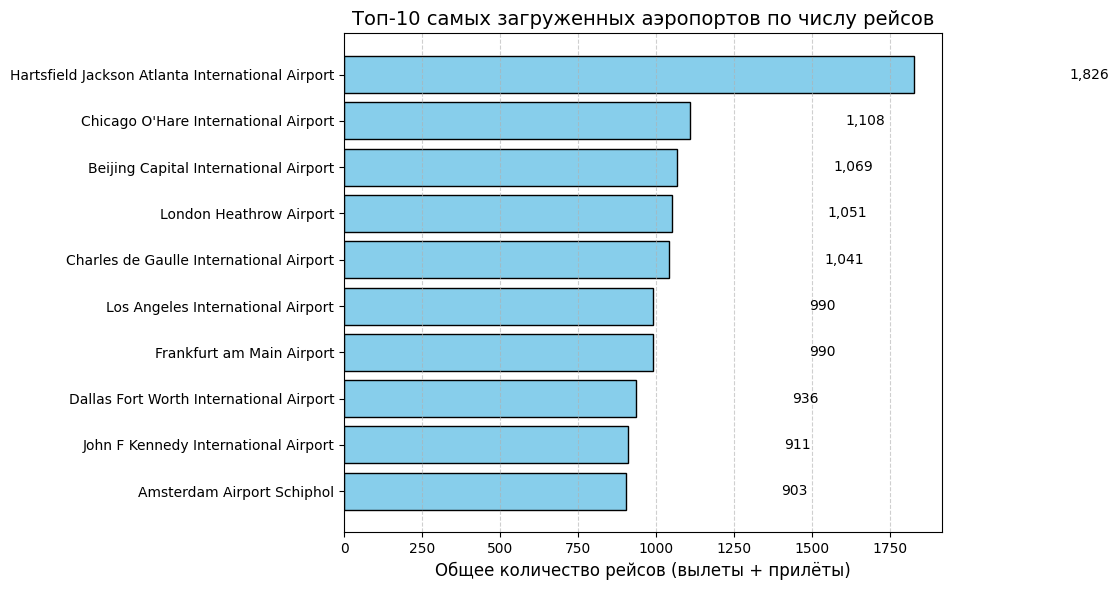

In [15]:
plt.figure(figsize=(12, 6))
bars = plt.barh(top10['Name'], top10['Total'], color='skyblue', edgecolor='black')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

plt.gca().invert_yaxis()  # Чтобы самый загруженный был вверху
plt.title('Топ-10 самых загруженных аэропортов по числу рейсов', fontsize=14)
plt.xlabel('Общее количество рейсов (вылеты + прилёты)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

## Интерактивная карта аэропортов мира по континентам
### Шаги:
1. **Создание справочника стран и континентов**:
   - Каждой стране из общего списка сопоставляется её континент.
2. **Добавление континента к каждому аэропорту**:
   - Используем `.map()` по колонке `Country`, чтобы добавить новую колонку `Continent` в датафрейм `airports`.
3. **Формирование слоёв карты по континентам**:
   - Для каждого континента создаётся слой (`trace`) с маркерами аэропортов.
   - Каждая точка имеет подпись по IATA‑коду и отображается на карте.
4. **Создание интерактивного меню (кнопки переключения континентов)**:
   - Меню позволяет выбрать отображение аэропортов только одного континента.
   - По умолчанию активен первый континент в списке.
5. **Настройка внешнего вида карты**:
   - Цвет земли, океана, стран, береговой линии и границ выбран так, чтобы карта выглядела аккуратно и современно.
   - Центрированный заголовок и увеличенное разрешение делают её читабельной даже на больших экранах.


In [16]:
unique_countries = set(Total['Country'])
# Список всех стран
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
    'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
    'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
    'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
    'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island',
    'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Cook Islands',
    'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
    'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
    'Ethiopia', 'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia',
    'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam',
    'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland',
    'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
    'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho',
    'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Macau', 'Macedonia', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
    'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia',
    'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
    'Netherlands Antilles', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island',
    'North Korea', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea',
    'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia',
    'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
    'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore',
    'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain',
    'Sri Lanka', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 'Switzerland', 'Taiwan', 'Tajikistan', 'Tanzania',
    'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands',
    'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
    'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia',
    'Zimbabwe'
]

# Азия
asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Burma', 'Cambodia', 'China',
    'Christmas Island', 'Cocos (Keeling) Islands', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran',
    'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia',
    'Maldives', 'Mongolia', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia',
    'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Tajikistan', 'Taiwan', 'Thailand', 'Turkey', 'Turkmenistan',
    'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'
]

# Европа
europe = [
    'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece',
    'Greenland', 'Guernsey', 'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey', 'Latvia', 'Lithuania',
    'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
    'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'
]

# Африка
africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde',
    'Central African Republic', 'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', "Cote d'Ivoire", 'Djibouti',
    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
    'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Reunion', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
    'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo',
    'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe'
]

# Северная Америка
north_america = [
    'Anguilla', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Canada', 'Cayman Islands',
    'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Greenland', 'Grenada', 'Guadeloupe',
    'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico', 'Nicaragua', 'Panama', 'Puerto Rico',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
    'Trinidad and Tobago', 'United States', 'Virgin Islands'
]

# Южная Америка
south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'French Guiana', 'Guyana', 'Paraguay', 'Peru',
    'Suriname', 'Uruguay', 'Venezuela'
]

# Океания
oceania = [
    'American Samoa', 'Australia', 'Cook Islands', 'Fiji', 'Guam', 'Kiribati', 'Marshall Islands', 'Micronesia',
    'Nauru', 'New Caledonia', 'New Zealand', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Palau',
    'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis and Futuna'
]

# Антарктида
antarctica = [
    'Antarctica'
]
country_to_continent = {}
for country in countries:
    if country in asia:
        country_to_continent[country] = 'Азия'
    elif country in europe:
        country_to_continent[country] = 'Европа'
    elif country in africa:
        country_to_continent[country] = 'Африка'
    elif country in north_america:
        country_to_continent[country] = 'Сев. Америка'
    elif country in south_america:
        country_to_continent[country] = 'Юж. Америка'
    elif country in oceania:
        country_to_continent[country] = 'Австралия/Океания'
    elif country in antarctica:
        country_to_continent[country] = 'Антарктида'
    else:
        country_to_continent[country] = 'Неизвестно'

# создаём датафрейм
df_country_continent = pd.DataFrame(list(country_to_continent.items()), columns=['Country', 'Continent'])
airports['Continent'] = airports['Country'].map(country_to_continent)
continents = ['Европа', 'Азия', 'Африка', 'Сев. Америка', 'Юж. Америка', 'Австралия/Океания', 'Антарктида']
data = []
buttons = []
for continent in continents: 
    df_cont = airports[airports['Continent'] == continent] 
    trace = go.Scattergeo(                   
        lon = df_cont['Longitude'],
        lat = df_cont['Latitude'],
        text = df_cont['IATA'],
        mode = 'markers',
        marker = dict(color = 'blue'),
        name = continent,
    )
    data.append(trace) 
    buttons.append(            
        dict(
            method = 'update',
            label = continent,
            args = [{'visible': [c == continent for c in continents]}, 
                    {'title': f"Аэропорты на континенте: {continent}"}]
        )
    )
    
data[0].visible = True

fig = go.Figure(data=data)
fig.update_layout(
    title={
        'text': 'Аэропорты мира по континентам',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',         
        'yanchor': 'top',
        'font': dict(size=26)
    },
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(230, 230, 230)',    
        showocean=True,
        oceancolor='rgb(200, 230, 255)',   
        showcountries=True,
        countrycolor='rgb(180, 180, 180)', 
        coastlinecolor='rgb(100, 100, 100)', 
        showcoastlines=True,
        showframe=False,
        resolution=50,                   
    ),
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            x=0,
            y=1.1,
            xanchor='left',
            yanchor='top'
        )
    ],
    margin=dict(l=0, r=0, t=100, b=0),
    height=800,
    width=1400,  
    paper_bgcolor='white'
)

NameError: name 'go' is not defined

## Анализ авиакомпаний: рейсы, география и маршруты

Данный блок кода выполняет комплексный анализ активности авиакомпаний на основе данных о маршрутах и аэропортах. Мы оцениваем авиакомпании по трём основным критериям: количество рейсов, охват стран и уникальность маршрутов.


In [153]:
# Добавим страну отправления
routes = routes.merge(
    airports[['Airport_id', 'Country']],
    left_on='Source airport ID',
    right_on='Airport_id',
    how='left'
).rename(columns={'Country': 'Source_country'}).drop(columns='Airport_id')

# Добавим страну назначения
routes = routes.merge(
    airports[['Airport_id', 'Country']],
    left_on='Destination airport ID',
    right_on='Airport_id',
    how='left'
).rename(columns={'Country': 'Dest_country'}).drop(columns='Airport_id')

# 1. Количество рейсов по авиакомпаниям
flights_count = routes['Airline'].value_counts().reset_index()
flights_count.columns = ['Airline', 'Total_Flights']

# 2. Количество уникальных стран, куда или откуда летает авиакомпания
countries_long = pd.melt(
    routes,
    id_vars=['Airline'],
    value_vars=['Source_country', 'Dest_country'],
    value_name='Country'
).dropna()

country_coverage = (
    countries_long
    .groupby('Airline')['Country']
    .nunique()
    .reset_index(name='Countries_Covered')
)

# 3. Количество уникальных маршрутов по кодам аэропортов
routes['Route'] = routes['Source airport'] + ' → ' + routes['Destination airport']
route_coverage = (
    routes.groupby('Airline')['Route']
    .nunique()
    .reset_index(name='Unique_Routes')
)

# 4. Финальный анализ
airline_summary = (
    flights_count
    .merge(country_coverage, on='Airline')
    .merge(route_coverage, on='Airline')
    .sort_values(by='Total_Flights', ascending=False)
    .reset_index(drop=True)
)
airline_summary

,Airline,Total_Flights,Countries_Covered,Unique_Routes
0,FR,2484,29,2484
1,AA,2354,96,2354
2,UA,2180,97,2180
3,DL,1981,77,1981
4,US,1960,65,1960
...,...,...,...,...
562,GY,2,2,2
563,H7,2,1,2
564,YR,2,1,2
565,9D,1,2,1


## Анализ авиакомпаний: визуализация ключевых метрик

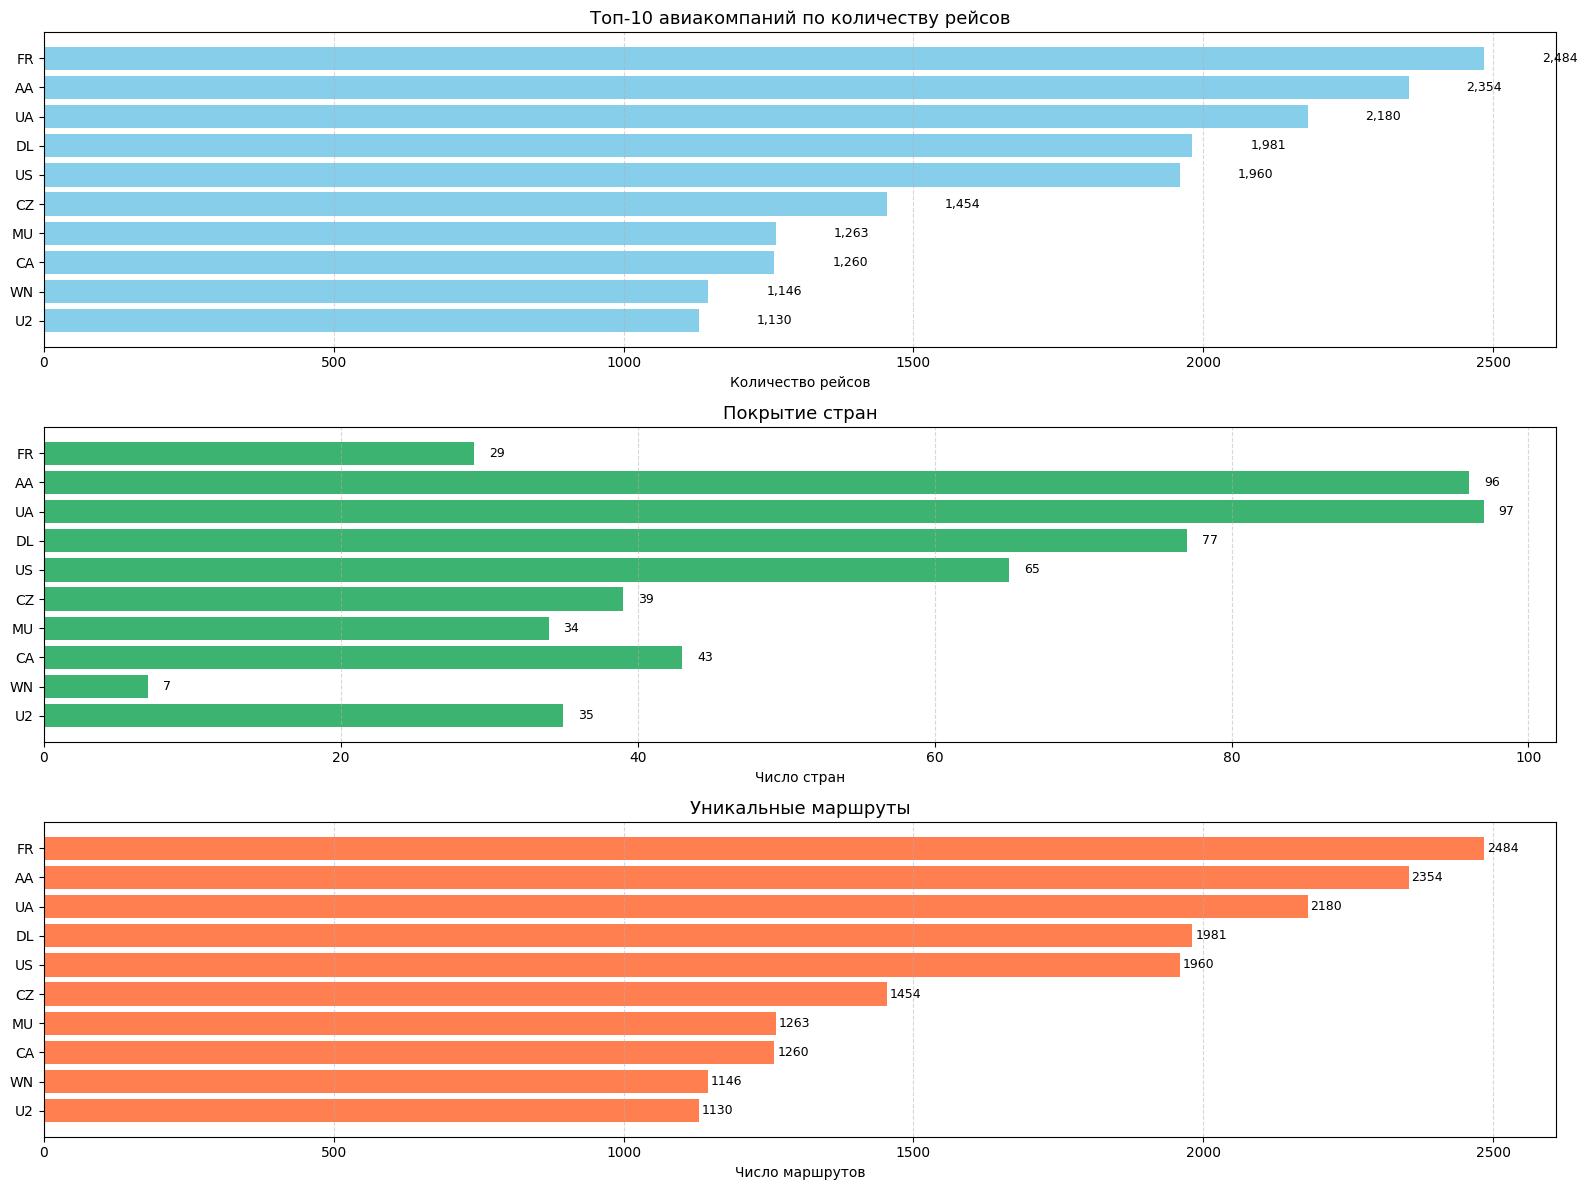

In [155]:
# Отбираем топ-10 авиакомпаний по количеству рейсов
top10 = airline_summary.sort_values('Total_Flights', ascending=False).head(10)

# Устанавливаем общий стиль
plt.figure(figsize=(16, 12))

# График 1: Количество рейсов
plt.subplot(3, 1, 1)
bars1 = plt.barh(top10['Airline'], top10['Total_Flights'], color='skyblue')
plt.title('Топ-10 авиакомпаний по количеству рейсов', fontsize=13)
for bar in bars1:
    plt.text(bar.get_width() + 100, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}', va='center', fontsize=9)
plt.xlabel('Количество рейсов')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# График 2: Покрытие стран
plt.subplot(3, 1, 2)
bars2 = plt.barh(top10['Airline'], top10['Countries_Covered'], color='mediumseagreen')
plt.title('Покрытие стран', fontsize=13)
for bar in bars2:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=9)
plt.xlabel('Число стран')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# График 3: Уникальные маршруты
plt.subplot(3, 1, 3)
bars3 = plt.barh(top10['Airline'], top10['Unique_Routes'], color='coral')
plt.title('Уникальные маршруты', fontsize=13)
for bar in bars3:
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center', fontsize=9)
plt.xlabel('Число маршрутов')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Завершающее оформление
plt.tight_layout()
plt.show()